# Assignment1
     Clayton Cohn
     April 2, 2020
     DSC478
     Prof. Mobasher

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = '/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/bank_data.csv'

In [ ]:
df = pd.read_csv(DATA_PATH, delimiter=',')

In [26]:
df.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [22]:
df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


1. Explore the general characteristics of the data as a whole: examine the __means__, __standard deviations__, and __other statistics__ associated with the numerical attributes; also __show the distributions of values__ associated with categorical attributes

In [34]:
# means
print("Means:")
print(df[["age","income","children"]].mean())
print("\n")

#standard deviations
print("\nStandard deviations:")
print(df[["age","income","children"]].std())
print("\n")

#description
print("Description:")
print(df[["age","income","children"]].describe())
print("\n")

#correlation matrix
print("Correlation:")
print(df[["age","income","children"]].corr())

Means:
age            42.395000
income      27524.031217
children        1.011667
dtype: float64



Standard deviations:
age            14.424947
income      12899.468246
children        1.056752
dtype: float64


Description:
              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000


Correlation:
               age    income  children
age       1.000000  0.752726  0.023572
income    0.752726  1.000000  0.036761
children  0.023572  0.036761  1.000000


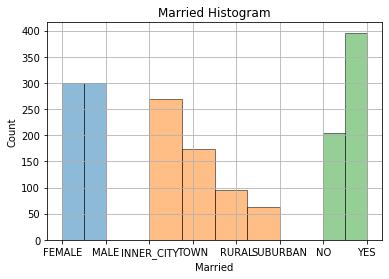

In [55]:
# categorical attributes - gender
hist_gender =plt.hist(df["gender"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Histogram')
plt.grid(True)

# categorical attributes - region
plt.hist(df["region"], bins=4, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Histogram')
plt.grid(True)

# categorical attributes - married
plt.hist(df["married"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married Histogram')
plt.grid(True)

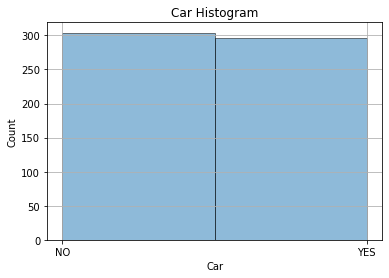

In [56]:
# categorical attributes - car
plt.hist(df["car"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Car')
plt.ylabel('Count')
plt.title('Car Histogram')
plt.grid(True)

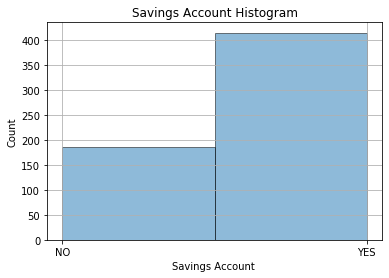

In [57]:
# categorical attributes - savings_acct
plt.hist(df["savings_acct"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Savings Account')
plt.ylabel('Count')
plt.title('Savings Account Histogram')
plt.grid(True)

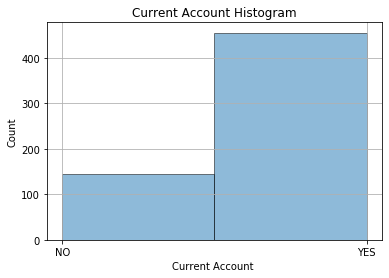

In [59]:
# categorical attributes - current_acct
plt.hist(df["current_acct"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Current Account')
plt.ylabel('Count')
plt.title('Current Account Histogram')
plt.grid(True)

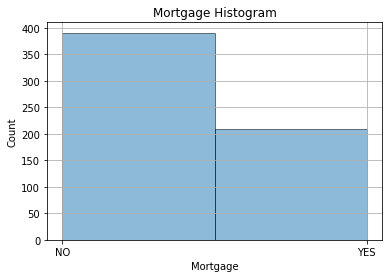

In [60]:
# categorical attributes - mortgage
plt.hist(df["mortgage"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Mortgage')
plt.ylabel('Count')
plt.title('Mortgage Histogram')
plt.grid(True)

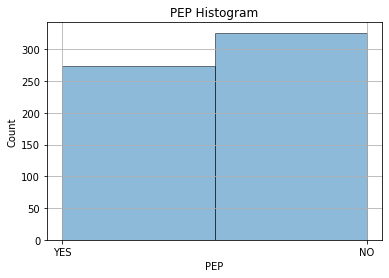

In [61]:
# categorical attributes - pep
plt.hist(df["pep"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('PEP')
plt.ylabel('Count')
plt.title('PEP Histogram')
plt.grid(True)